In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from collections import defaultdict
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import math
%matplotlib inline



In [144]:
df_lis = pd.read_csv('listings.csv')


In [145]:
#Below code gives information about the number of columns and number of rows.
print(df_lis.shape)


(3585, 95)


In [146]:
df_lis.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


This dataset has the information regarding each house in the area of Boston. Let's dig deep into the dataset.


In [147]:
df_lis.dtypes.value_counts()

object     62
float64    18
int64      15
dtype: int64

In [148]:
df_lis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [149]:
#Below code show the name of the columns which are float64 data type
df_lis.dtypes[df_lis.dtypes=='float64']

neighbourhood_group_cleansed    float64
latitude                        float64
longitude                       float64
bathrooms                       float64
bedrooms                        float64
beds                            float64
square_feet                     float64
has_availability                float64
review_scores_rating            float64
review_scores_accuracy          float64
review_scores_cleanliness       float64
review_scores_checkin           float64
review_scores_communication     float64
review_scores_location          float64
review_scores_value             float64
license                         float64
jurisdiction_names              float64
reviews_per_month               float64
dtype: object

In [150]:
#Below code show the name of the columns which are int64 data type
df_lis.dtypes[df_lis.dtypes=='int64']

id                                int64
scrape_id                         int64
host_id                           int64
host_listings_count               int64
host_total_listings_count         int64
accommodates                      int64
guests_included                   int64
minimum_nights                    int64
maximum_nights                    int64
availability_30                   int64
availability_60                   int64
availability_90                   int64
availability_365                  int64
number_of_reviews                 int64
calculated_host_listings_count    int64
dtype: object

In [151]:
#Below code show the name of the columns which are object data type
pd.set_option('display.max_rows', 92)
df_lis.dtypes[df_lis.dtypes=='object']

listing_url                         object
last_scraped                        object
name                                object
summary                             object
space                               object
description                         object
experiences_offered                 object
neighborhood_overview               object
notes                               object
transit                             object
access                              object
interaction                         object
house_rules                         object
thumbnail_url                       object
medium_url                          object
picture_url                         object
xl_picture_url                      object
host_url                            object
host_name                           object
host_since                          object
host_location                       object
host_about                          object
host_response_time                  object
host_respon

There should be rectification in the data type of price columns. It's in object data type now but it should be changed into float data type for all those price columns


In [152]:
#Below code shows the number of missing values in each column in descending order
df_lis.isnull().sum().sort_values(ascending=False)

has_availability                3585
license                         3585
neighbourhood_group_cleansed    3585
jurisdiction_names              3585
square_feet                     3529
                                ... 
is_location_exact                  0
room_type                          0
accommodates                       0
bed_type                           0
country                            0
Length: 95, dtype: int64

As you can see there are many columns which has missing values. Checking for missing values is one of the few factors that should be done in data cleaning process

In [153]:
#Below code shows the columns names that do not have any missing values and all values are unique (different from each other) 
df_lis.nunique()[df_lis.nunique()==len(df_lis)]

id             3585
listing_url    3585
picture_url    3585
latitude       3585
longitude      3585
dtype: int64

In [154]:
#Below code shows the columns names that have some missing values and number of unique values in that column
df_lis.nunique()[df_lis.nunique() != len(df_lis)].sort_values(ascending=False)

name                                3504
description                         3423
summary                             3113
amenities                           3092
xl_picture_url                      2986
medium_url                          2986
thumbnail_url                       2986
space                               2268
host_url                            2181
host_id                             2181
host_picture_url                    2174
host_thumbnail_url                  2174
house_rules                         1928
transit                             1859
access                              1762
neighborhood_overview               1728
interaction                         1617
host_name                           1334
host_since                          1281
notes                               1269
host_about                          1240
street                              1239
first_review                         975
reviews_per_month                    644
last_review     

## Question 1 - What amentities in Boston AirBnbs' are available in abundance?


In [155]:
#I first create an empty list to fill with amenities available.
list_of_amenities = []

#I create a for loop to append all amenities values from the dataset into the list.
for i in range(len(df_lis)):
    list_of_amenities.append(df_lis['amenities'][i])

    
#In the dataset, every listing has a list of amenities, so in order to take unique amenities from the whole dataset
#I use the below code. I use the "set" function to make the amenities unique and than convert the set into a list
#to remain consistency of data type.
list_of_amenities = list((s.strip('\'\{\}') for s in list_of_amenities))
list_of_amenities_string = ",".join(list_of_amenities)
list_of_amenities = list(set(list_of_amenities_string.split(",")))

#After execution the above lines in this cell, we have an empty string in the list of amenties.
#We have to remove that one from the list.
without_empty_list_of_amenities = []
for string in list_of_amenities:
    if (string != ""):
        without_empty_list_of_amenities.append(string)
list_of_amenities = without_empty_list_of_amenities

In [156]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of amenities
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the amenity is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

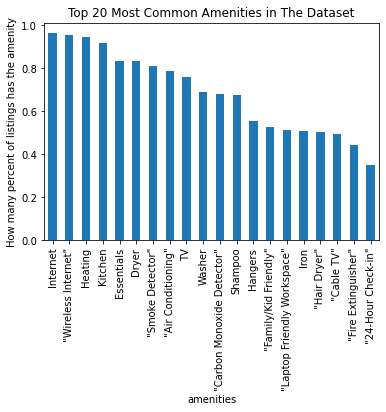

In [157]:
#I create a dataframe named study, which has lists of amenities as one column and the count of these amenities lists
#in our main (df_lis)
study = df_lis['amenities'].value_counts().reset_index()
study.rename(columns={'index': 'amenities', 'amenities': 'count'}, inplace=True)

#Here with the total_count function, I count the number of listings that contains each amenity in the amenities list.
study_df = total_count(study, 'amenities', 'count', list_of_amenities)
study_df.set_index('amenities', inplace=True)

#Here I create a bar chart to show the percentage of each amenity from the most common to the least common.
(study_df/len(df_lis))[:20].plot(kind='bar', legend=None);
plt.title('Top 20 Most Common Amenities in The Dataset');
plt.ylabel('How many percent of listings has the amenity')
plt.show()

As you can see Internet and Heating are the most common amentities in the area of Boston. More than 90% of the listings have those features in their AirBnb

Fire Extinguisher and 24 hour checkin option are the least amentities that are availble in the area of Boston. Just bit higher than 40% of the listings have fire extinguishers and less than 40% have 24 hour check in option

## Question 2 - What are the features that attracts the most to rent a property?


Availability_30 column gives an idea about the popularity of the listing. So, let's start with checking the missing values of that column

In [158]:
#Check if availability_30 column has an missing values. I will use this columns for booking_ratio_30.
df_lis['availability_30'].isnull().sum()
0

0

In [159]:
#Below code, creates the column 'booking_ratio_30' which gives info about the booking percentage in the next 30 days
df_lis['booking_ratio_30'] = 1 - (df_lis['availability_30']/30)

In [160]:
#Show the first five rows of the new column
df_lis['booking_ratio_30'].head()


0    1.000000
1    0.133333
2    0.366667
3    0.800000
4    0.566667
Name: booking_ratio_30, dtype: float64

Now let's create seperate columns for each of the features that I will look into to check how they influence the popluarity of a listing

In [161]:
#Below code checks if the 'room_type' column has any missing values.
#Since the result of the code is zero, the column does not have any missing values. 
df_lis['room_type'].isnull().sum()

0

In [162]:
#Below code shows the number of each unique values in the 'room_type' column.
df_lis['room_type'].value_counts().sort_values(ascending=False)

Entire home/apt    2127
Private room       1378
Shared room          80
Name: room_type, dtype: int64

Now the booking ratios of those three room types

In [163]:
#Below code shows information about booking ratios of different room types for next 30 days
df_lis.groupby(['room_type'])['booking_ratio_30'].mean().sort_values(ascending=False)

room_type
Private room       0.739332
Entire home/apt    0.699091
Shared room        0.569583
Name: booking_ratio_30, dtype: float64

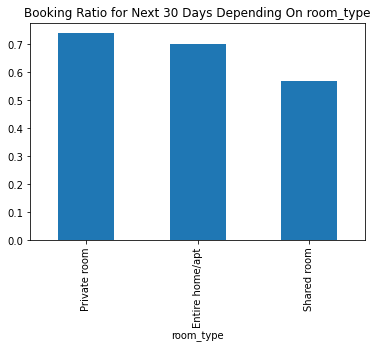

In [164]:

#Below code plots a bar chart to visualize booking ratios of different room types for next 30 days
(df_lis.groupby(['room_type'])['booking_ratio_30'].mean().sort_values(ascending=False)).plot(kind='bar', legend=None)
plt.title('Booking Ratio for Next 30 Days Depending On room_type');
plt.show()

In [165]:
#Below code shows the unique property types and count of each one
df_lis['property_type'].value_counts().sort_values(ascending=False)

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Camper/RV             1
Guesthouse            1
Name: property_type, dtype: int64

In [166]:
#Below code shows information about booking ratios of different property types for next 30 days
df_lis.groupby(['property_type'])['booking_ratio_30'].mean().sort_values(ascending=False)

property_type
Villa              0.950000
Camper/RV          0.866667
Dorm               0.816667
Loft               0.789744
Condominium        0.769120
Townhouse          0.722840
Apartment          0.713846
Bed & Breakfast    0.705691
Entire Floor       0.683333
House              0.682800
Guesthouse         0.600000
Other              0.576471
Boat               0.241667
Name: booking_ratio_30, dtype: float64

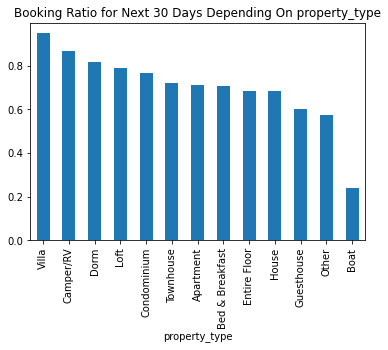

In [167]:
#Below code plots the booking ratios of different property types for next 30 days
(df_lis.groupby(['property_type'])['booking_ratio_30'].mean().sort_values(ascending=False)).plot(kind='bar', legend=None)
plt.title('Booking Ratio for Next 30 Days Depending On property_type');
plt.show()

In [168]:
#Check if amenities column has an missing values.
df_lis['amenities'].isnull().sum()

0

In [169]:

#Here I create new columns for each of the amenities and fill them all with zeros.
for i in range(len(list_of_amenities)):
    df_lis[list_of_amenities[i]] = 0

In [170]:
#Here I fill the new amenities columns, by first checking if the listing has that amenity.
#If the listing has that amenity I fill it with 1 and if it does not have it, I fill it with zero.
for i in range(len(list_of_amenities)):
    for t in range(len(df_lis)):
        if list_of_amenities[i] in df_lis['amenities'][t]:
            df_lis.loc[t , list_of_amenities[i]] = 1
        else:
            df_lis.loc[t , list_of_amenities[i]] = 0

In [171]:
amenities_importance = pd.DataFrame(index=range(0,len(list_of_amenities)), columns = ["Amenity_Name", "Booking Ratio for HAVING the Amenity", "Booking Ratio for NOT HAVING the Amenity", "Booking Difference"])


#In the below for loop, I write the name of the amenity, calculate the booking ratio of listings that contain the amenitiy
#and calculate the booking ratio of listings that do not contain the amenitiy
#and calculate the difference between booking ratios for each amenity. 
for i in range(len(list_of_amenities)):
    amenities_importance['Amenity_Name'][i] = list_of_amenities[i]
    amenities_importance['Booking Ratio for HAVING the Amenity'][i] = df_lis.groupby([list_of_amenities[i]])['booking_ratio_30'].mean()[1]
    amenities_importance['Booking Ratio for NOT HAVING the Amenity'][i] = df_lis.groupby([list_of_amenities[i]])['booking_ratio_30'].mean()[0]
    amenities_importance['Booking Difference'][i] = amenities_importance['Booking Ratio for HAVING the Amenity'][i] - amenities_importance['Booking Ratio for NOT HAVING the Amenity'][i]

amenities_importance.set_index('Amenity_Name', inplace=True)

In [172]:

#Here I list the Top 10 booking difference to see which amenities are most prefered by guests.
amenities_importance.sort_values(by='Booking Difference', ascending = False)[:10]

,Booking Ratio for HAVING the Amenity,Booking Ratio for NOT HAVING the Amenity,Booking Difference
Amenity_Name,,,
"""Smoke Detector""",0.741028,0.584866,0.156162
"""translation missing: en.hosting_amenity_49""",0.777402,0.702377,0.075025
"""Buzzer/Wireless Intercom""",0.762376,0.696176,0.0662
"""Fire Extinguisher""",0.748335,0.682709,0.065626
"""Carbon Monoxide Detector""",0.731791,0.668679,0.063112
"""Wireless Internet""",0.714362,0.655488,0.058874
"""Hot Tub""",0.763872,0.709118,0.054754
"""Other pet(s)""",0.760417,0.71145,0.048966
"""Lock on Bedroom Door""",0.752602,0.705432,0.04717


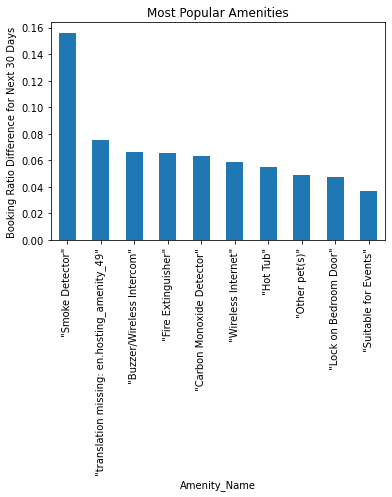

In [173]:
#Here I draw a bar chart to visualize which amenities are most prefered by guests.
amenities_importance['Booking Difference'].sort_values(ascending = False)[:10].plot(kind='bar', legend=None)
plt.title('Most Popular Amenities');
plt.ylabel('Booking Ratio Difference for Next 30 Days')
plt.show()

# Question 3- What are the most influencial factors to estimate the price for a listing?


As you saw earlier there were many missing values in the dataset. Let's have a look at the missing values related to price

In [174]:
print(df_lis['price'].isnull().sum())
print(df_lis['weekly_price'].isnull().sum())
print(df_lis['monthly_price'].isnull().sum())
print(df_lis['security_deposit'].isnull().sum())
print(df_lis['cleaning_fee'].isnull().sum())

0
2693
2697
2243
1107


In [175]:
#Below, I made a list of important features in my opinion for estimating the price of a listing and created
#a sub-dataframe of listings dataframe.

#In order to answer the first question, I made columns for amenities categorical value, I will use all amenities columns
#I created there.

features_of_interest = ['bathrooms', 'bedrooms', 'beds', 'latitude', 'longitude', 'square_feet', 'reviews_per_month',
        'booking_ratio_30', 'accommodates', 'guests_included', '"24-Hour Check-in"', '"Suitable for Events"',
       '"Pets live on this property"', 'Dog(s)', '"Smoking Allowed"',
       '"Other pet(s)"', 'Essentials', '"Wireless Internet"',
       '"Buzzer/Wireless Intercom"', 'TV', 'Gym', 'Washer', 'Doorman', 'Dryer',
       '"Hot Tub"', '"Air Conditioning"', '"Pets Allowed"', 'Pool',
       '"Hair Dryer"', '"Fire Extinguisher"', 'Breakfast', '"Washer / Dryer"',
       '"Laptop Friendly Workspace"', '"Free Parking on Premises"',
       '"Lock on Bedroom Door"', 'Cat(s)', 'Hangers', '"Family/Kid Friendly"',
       '"Carbon Monoxide Detector"', '"Safety Card"', 'Kitchen',
       '"Elevator in Building"', 'Internet', 'Shampoo', '"Smoke Detector"',
       '"Wheelchair Accessible"', 'Iron', '"First Aid Kit"',
       '"Indoor Fireplace"', '"Cable TV"', 'Heating', 'host_is_superhost', 'neighbourhood_group_cleansed',
        'property_type','room_type','bed_type','price','security_deposit',
        'cleaning_fee', 'extra_people', 'instant_bookable', 'cancellation_policy']

df_lis_ml = df_lis[features_of_interest]

In [176]:
#Now lets check the missing values in each columns and find a way to fill them.

df_lis_ml.isnull().sum()[df_lis_ml.isnull().sum()>0]

bathrooms                         14
bedrooms                          10
beds                               9
square_feet                     3529
reviews_per_month                756
neighbourhood_group_cleansed    3585
property_type                      3
security_deposit                2243
cleaning_fee                    1107
dtype: int64

There are 9 columns that have missing columns. We need to rectify this before doing the analysis. 
More than 95% of values in square_feet and neighbourhood_group_cleansed is missing. So there's no point in having those columns. Dropping those columns will be the best possible solution.
Bathrooms beds and bedrooms have very few missing values.Reviews_per_month has less missing values compared to cleaning_fee,neighbourhood_group_cleansed and security_deposit. So I decided to replace those missing values in those mentioned columns with their mean value since they are all float values.
For the categorical column which is property type we chose the mode method to replace the missing values because there are only 3 values.
I assumed for the columns security_deposit and cleaning_fee, missing values equal to zero. So, I filled the missing values with zero.


In [177]:

df_lis_ml = df_lis_ml.drop(columns=['square_feet','neighbourhood_group_cleansed'])

In [178]:
#Below, I replace the missing values of 4 features (bathrooms, bedrooms, beds and reviews_per_month) with
#mean values of each feature in the dataset.

df_lis_ml['bathrooms'].fillna(df_lis_ml['bathrooms'].mean(), inplace=True)
df_lis_ml['bedrooms'].fillna(df_lis_ml['bedrooms'].mean(), inplace=True)
df_lis_ml['beds'].fillna(df_lis_ml['beds'].mean(), inplace=True)
df_lis_ml['reviews_per_month'].fillna(df_lis_ml['reviews_per_month'].mean(), inplace=True)

In [179]:
#Below, I replace the missing values of property_type with
#mode values (most common) of each feature in the dataset.


df_lis_ml['property_type'].fillna(df_lis_ml['property_type'].mode()[0], inplace=True)

In [180]:
#Below, I replace the missing values of 2 features (security_deposit and cleaning_fee) with zeros.
#The missing values in these features most probably mean they are equal to zero

df_lis_ml['security_deposit'].fillna(0, inplace=True)
df_lis_ml['cleaning_fee'].fillna(0, inplace=True)

In [181]:
df_lis_ml.dtypes

bathrooms                       float64
bedrooms                        float64
beds                            float64
latitude                        float64
longitude                       float64
reviews_per_month               float64
booking_ratio_30                float64
accommodates                      int64
guests_included                   int64
"24-Hour Check-in"                int64
"Suitable for Events"             int64
"Pets live on this property"      int64
Dog(s)                            int64
"Smoking Allowed"                 int64
"Other pet(s)"                    int64
Essentials                        int64
"Wireless Internet"               int64
"Buzzer/Wireless Intercom"        int64
TV                                int64
Gym                               int64
Washer                            int64
Doorman                           int64
Dryer                             int64
"Hot Tub"                         int64
"Air Conditioning"                int64


Now I will make some changes to the datatypes of price,security_deposit,cleaning_fee and create new columns for categorical values.

In [182]:
#In the columns that have information about price, the $ signs and (comma) signs has to be removed. 

df_lis_ml['price'] = df_lis_ml['price'].str.replace('$', '')
df_lis_ml['security_deposit'] = df_lis_ml['security_deposit'].str.replace('$', '')
df_lis_ml['cleaning_fee'] = df_lis_ml['cleaning_fee'].str.replace('$', '')
df_lis_ml['extra_people'] = df_lis_ml['extra_people'].str.replace('$', '')

df_lis_ml['price'] = df_lis_ml['price'].str.replace(',', '')
df_lis_ml['security_deposit'] = df_lis_ml['security_deposit'].str.replace(',', '')
df_lis_ml['cleaning_fee'] = df_lis_ml['cleaning_fee'].str.replace(',', '')
df_lis_ml['extra_people'] = df_lis_ml['extra_people'].str.replace(',', '')

#Removing $ and , signs made 0 (zero) values NaN again. So I have to fillna with 0 again. 
df_lis_ml['security_deposit'].fillna(0, inplace=True)
df_lis_ml['cleaning_fee'].fillna(0, inplace=True)

c:\users\msi\anaconda3\envs\my_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\msi\anaconda3\envs\my_env\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.
c:\users\msi\anaconda3\envs\my_env\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """
c:\users\msi\anaconda3\envs\my_env\

In [183]:
#Changing data type from string to float.
df_lis_ml['price'] = df_lis_ml['price'].astype(float)
df_lis_ml['security_deposit'] = df_lis_ml['security_deposit'].astype(float)
df_lis_ml['cleaning_fee'] = df_lis_ml['cleaning_fee'].astype(float)
df_lis_ml['extra_people'] = df_lis_ml['extra_people'].astype(float)

In [184]:
#creating a new dataframe which is a subset of categorical columns of out df_lis_ml dataframe
cat_cols = df_lis_ml.select_dtypes(include=['object'])

In [185]:
cat_cols.head()

,host_is_superhost,property_type,room_type,bed_type,instant_bookable,cancellation_policy
0,f,House,Entire home/apt,Real Bed,f,moderate
1,f,Apartment,Private room,Real Bed,t,moderate
2,t,Apartment,Private room,Real Bed,f,moderate
3,f,House,Private room,Real Bed,f,moderate
4,t,House,Private room,Real Bed,f,flexible


In [186]:
# Making new columns from categorical variables in order to use these features in ML regression algoritm.
for col in cat_cols:
    try:
        df_lis_ml = pd.concat([df_lis_ml.drop(col, axis=1), pd.get_dummies(df_lis_ml[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)
    except:
        continue

Now the data is ready. I will be using Linear Regression to estimate price depending on features I selected.

In [187]:
#Creating the X (feautures) and y (the variable to be modelled) dataframes
y = df_lis_ml['price']
X = df_lis_ml.drop(columns='price')

In [188]:
#Splitting the new dataframes into train and test dataframes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [189]:
#Applying the linear regression, fitting the model, making predictions with the test set and scoring the success of the model
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)
y_test_preds = lm_model.predict(X_test)
test_score = r2_score(y_test, y_test_preds)
print(test_score)

0.22596990093420377


In [190]:
#Below function is taken from one of the Udacity jupyter notebook examples. I used this code to see coefficients of my model. 
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

Below is the list of most influential coefficients. 

In [191]:
coef_df.head(15)

,est_int,coefs,abs_coefs
3,latitude,524.877878,524.877878
4,longitude,243.387310,243.387310
30,"""Washer / Dryer""",138.339601,138.339601
56,property_type_Camper/RV,-115.087907,115.087907
75,cancellation_policy_super_strict_30,87.391213,87.391213
67,room_type_Shared room,-64.174186,64.174186
66,room_type_Private room,-62.333300,62.333300
21,Doorman,53.066911,53.066911
14,"""Other pet(s)""",-46.644780,46.644780
59,property_type_Entire Floor,-40.859021,40.859021


In order to increase r-squared value I will use SelectKBest. Below I write a function that tests different "k" numbers and compare r-squared for each k value

In [192]:
def find_optimal_number_of_selectors(X, y, k_samples, plot=True):
    '''
    INPUT:
    X dataframe that contains the features.
    y dataframe that contains the variable to be predicted.
    k_samples is a list of k values that will be tested.
    
    OUTPUT:
    A dictionary that contains values of tested k-values as keys and r-squared values for each key.
    The k-value that has the highest r-squared.

    '''   
    result_r_squareds = []
    results = {}
    for kes in k_samples:
        selector = SelectKBest(score_func=f_regression, k=kes)
        selector.fit_transform(X, y)
        selected_cols = selector.get_support(indices=True)
        features_new_X = X.iloc[:,selected_cols]
        
        X_train, X_test, y_train, y_test = train_test_split(features_new_X, y, test_size = 0.2, random_state=42)
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        result_r_squareds.append(r2_score(y_test, y_test_preds))
        results[str(kes)] = r2_score(y_test, y_test_preds)
    
    if plot:
        plt.plot(k_samples, result_r_squareds, label="r-squared", alpha=0.5)
        plt.xlabel("Different k_values")
        plt.ylabel("R_Squared_Values")
        plt.legend(loc=1)
        plt.show()
    
    best_k = max(results, key=results.get)
    
    return results, best_k

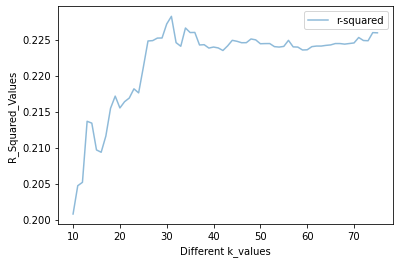

{'10': 0.20078429093784056, '11': 0.20471453157159714, '12': 0.20518427542431716, '13': 0.21366486429287623, '14': 0.21340872238171327, '15': 0.20968726361179824, '16': 0.2093630232729624, '17': 0.21161464694861865, '18': 0.21546522618716757, '19': 0.21715988695640698, '20': 0.21551730192488316, '21': 0.2163876373271717, '22': 0.21689378798619763, '23': 0.21817217099050423, '24': 0.21761086676392105, '25': 0.2211579115192508, '26': 0.22482082135428727, '27': 0.2248713783232693, '28': 0.2252222489773439, '29': 0.2252357608719353, '30': 0.22718544136309726, '31': 0.2282440362070437, '32': 0.22459013756352553, '33': 0.22408660799445368, '34': 0.22662531458882584, '35': 0.2259930039352177, '36': 0.22600706331242437, '37': 0.22426830992629498, '38': 0.22430446148958627, '39': 0.2238365225028608, '40': 0.223978974997723, '41': 0.22385506426332613, '42': 0.22349919167221655, '43': 0.2241369623412437, '44': 0.22491203343453547, '45': 0.22477833093934885, '46': 0.22457698207677224, '47': 0.2245

In [193]:
#I test a range of k values from 10 to 94 (which is the number of all features)
#and find the number of features that generate the highest r-squared value.
k_samples = range(10, len(X.columns))
emre_results, emre_best_k = find_optimal_number_of_selectors(X, y, k_samples)
print(emre_results)
print(emre_best_k)
print(emre_results[emre_best_k])

The highest r-squared value 0.228 was achieved with 30 features

Since this model came up with a low r-squared value this was moderate fit to model the data. 

## Question 4 -

In the dataset we have latitude and longitude that gives information about the location of the listing. I would like to investigate effect of listings' proximity to Boston City. Does it increase the price or decrease the price to be close to city. And how much does it effect the price? This is my final question to answer.

Below I have written a function that calculate the distance from city. According to Google Maps the coordinates of Boston City are 42.3601, -71.0589°. This is the coordinate that I will use to calculate the distance of every listing.

In [194]:
def distance_from_Boston_City(lat, lon, Boston_city=[42.361145, --71.057083]):
    '''
    INPUT:
    lat is the latitude of the point that I will calculate distance.
    lon is the longitude of the point that I will calculate distance.
    downtown is the coordinate of Seattle Downtown according to Google Maps. Downtown variable can be different, if the
    distance is expected to be calculated from a different point.
    
    OUTPUT:
    Distance between the point and the downtown.
    '''   
    R = 6373.0
    lat1 = math.radians(Boston_city[0])
    lon1 = math.radians(Boston_city[1])
    lat2 = math.radians(lat)
    lon2 = math.radians(lon)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    return distance

In [195]:
#Below I make a for look to calculate the distance of each listing from downtown.
#I create a new variable called 'distance_from_downtown' which has the information of distance of listing from downtown. 
for i in range(len(df_lis_ml)):
    df_lis_ml.loc[ i , 'distance_from_Boston_city'] = distance_from_Boston_city(df_lis_ml.loc[ i ,'latitude'] , df_lis_ml.loc[ i ,'longitude'])

In [196]:
#Since we added a distance variable, we do not need 'latitude', 'longitude' columns.
df_lis_ml.drop(columns=['latitude', 'longitude'], inplace=True)

In [197]:
#Creating the X (feautures) and y (the variable to be modelled) dataframes
y = df_lis_ml['price']
X = df_lis_ml.drop(columns='price')

In [198]:
#Splitting the new dataframes into train and test dataframes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [199]:
#Applying the linear regression, fitting the model, making predictions with the test set and scoring the success of the model
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)
y_test_preds = lm_model.predict(X_test)
test_score = r2_score(y_test, y_test_preds)
print(test_score)

0.23211192856001917


This is again a moderate fit to the model. 

In [200]:
#Previously I had written a function above to see coefficients of my regression model.
#The name of the function was "coef_weights"

#I use the function again to find the coefficients of the new model.
coef_df = coef_weights(lm_model.coef_, X_train)

In [201]:
#I print the coefficient of 'distance_from_downtown' variable
coef_df[coef_df['est_int'] == 'distance_from_Boston_city']

,est_int,coefs,abs_coefs
74,distance_from_Boston_city,-9.817173,9.817173


As you can see distance from the city has a negative effect on the price. More the distance from the city, less the price of the listing becomes. 1KM difference from the city makes the price of the listing go down by 10 USD. 